# FIFA 22 Video Game Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Change dtype of nation posistion and nation logo url because it gives mix dtype error
df = pd.read_csv('players_22.csv',dtype={'nation_position': 'object', 'nation_logo_url': 'object'})
#DATASET FROM: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset
pd.set_option('display.max_columns', 110)
pd.set_option('display.max_rows', 100)

In [3]:
df.shape

(19239, 110)

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 110 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    sofifa_id                    int64  
 1    player_url                   object 
 2    short_name                   object 
 3    long_name                    object 
 4    player_positions             object 
 5    overall                      int64  
 6    potential                    int64  
 7    value_eur                    float64
 8    wage_eur                     float64
 9    age                          int64  
 10   dob                          object 
 11   height_cm                    int64  
 12   weight_kg                    int64  
 13   club_team_id                 float64
 14   club_name                    object 
 15   league_name                  object 
 16   league_level                 float64
 17   club_position                object 
 18   club_jersey_number      

In [5]:
df.head(100)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


## Top 20 players by overall

In [6]:
sort_overall = df.sort_values(by='overall', ascending=False)
top_20_overall = sort_overall.head(20)
top_20_overall = top_20_overall[['short_name','overall','age','player_positions','club_name','nationality_name']]
top_20_overall.rename(columns = {'short_name':'Name', 'overall':'Overall','age':'Age','player_positions':'Position/s','club_name':'Club Name','nationality_name':'Nationality'}, inplace=True)
top_20_overall.set_index('Name')

,Overall,Age,Position/s,Club Name,Nationality
Name,,,,,
L. Messi,93,34,"RW, ST, CF",Paris Saint-Germain,Argentina
R. Lewandowski,92,32,ST,FC Bayern München,Poland
Cristiano Ronaldo,91,36,"ST, LW",Manchester United,Portugal
Neymar Jr,91,29,"LW, CAM",Paris Saint-Germain,Brazil
K. De Bruyne,91,30,"CM, CAM",Manchester City,Belgium
J. Oblak,91,28,GK,Atlético de Madrid,Slovenia
K. Mbappé,91,22,"ST, LW",Paris Saint-Germain,France
M. Neuer,90,35,GK,FC Bayern München,Germany
M. ter Stegen,90,29,GK,FC Barcelona,Germany


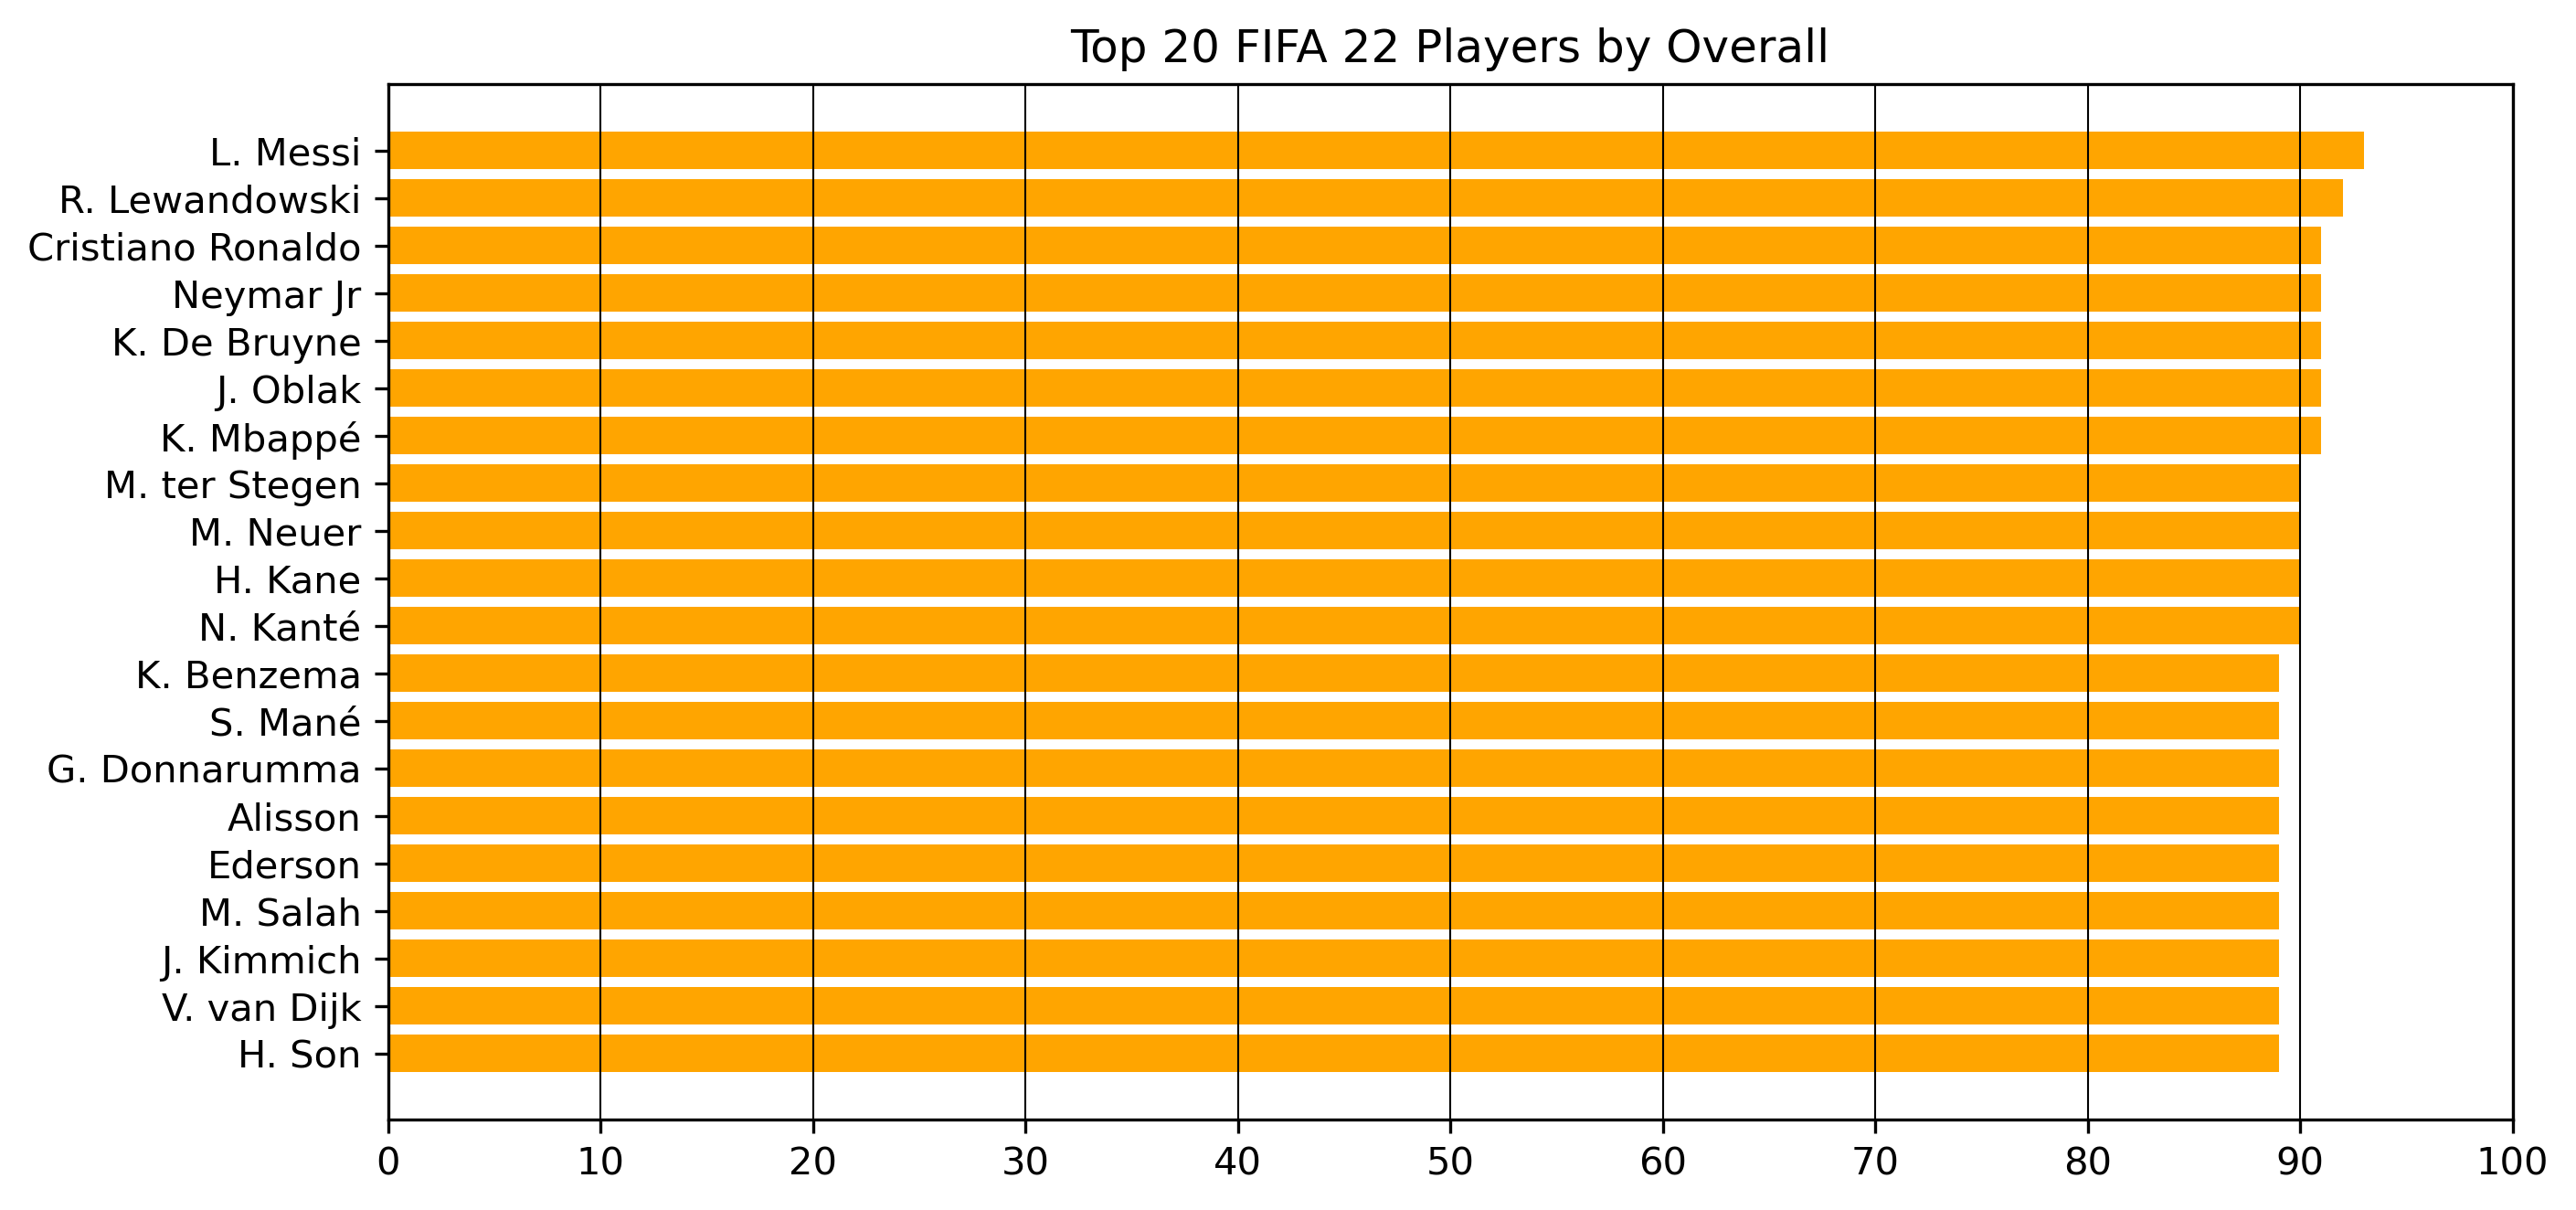

In [7]:
plt.figure(figsize = (10,5),dpi=300)

#setting ascending=True, will set the horizontal bar of matplotlib to descending order.
for_hbar_overall = top_20_overall.sort_values(by='Overall', ascending=True)

y = for_hbar_overall['Name']
x = for_hbar_overall['Overall']
plt.barh(y,x,color='orange')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid(True,color='black',axis='x',linestyle='-',linewidth=0.5)
plt.title('Top 20 FIFA 22 Players by Overall')

plt.show()

## Histogram players and overall

In [8]:
#sort_overall[['overall','short_name']]
#using describe will show the min,max and mean of overall
sort_overall['overall'].describe()

count    19239.000000
mean        65.772182
std          6.880232
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         93.000000
Name: overall, dtype: float64

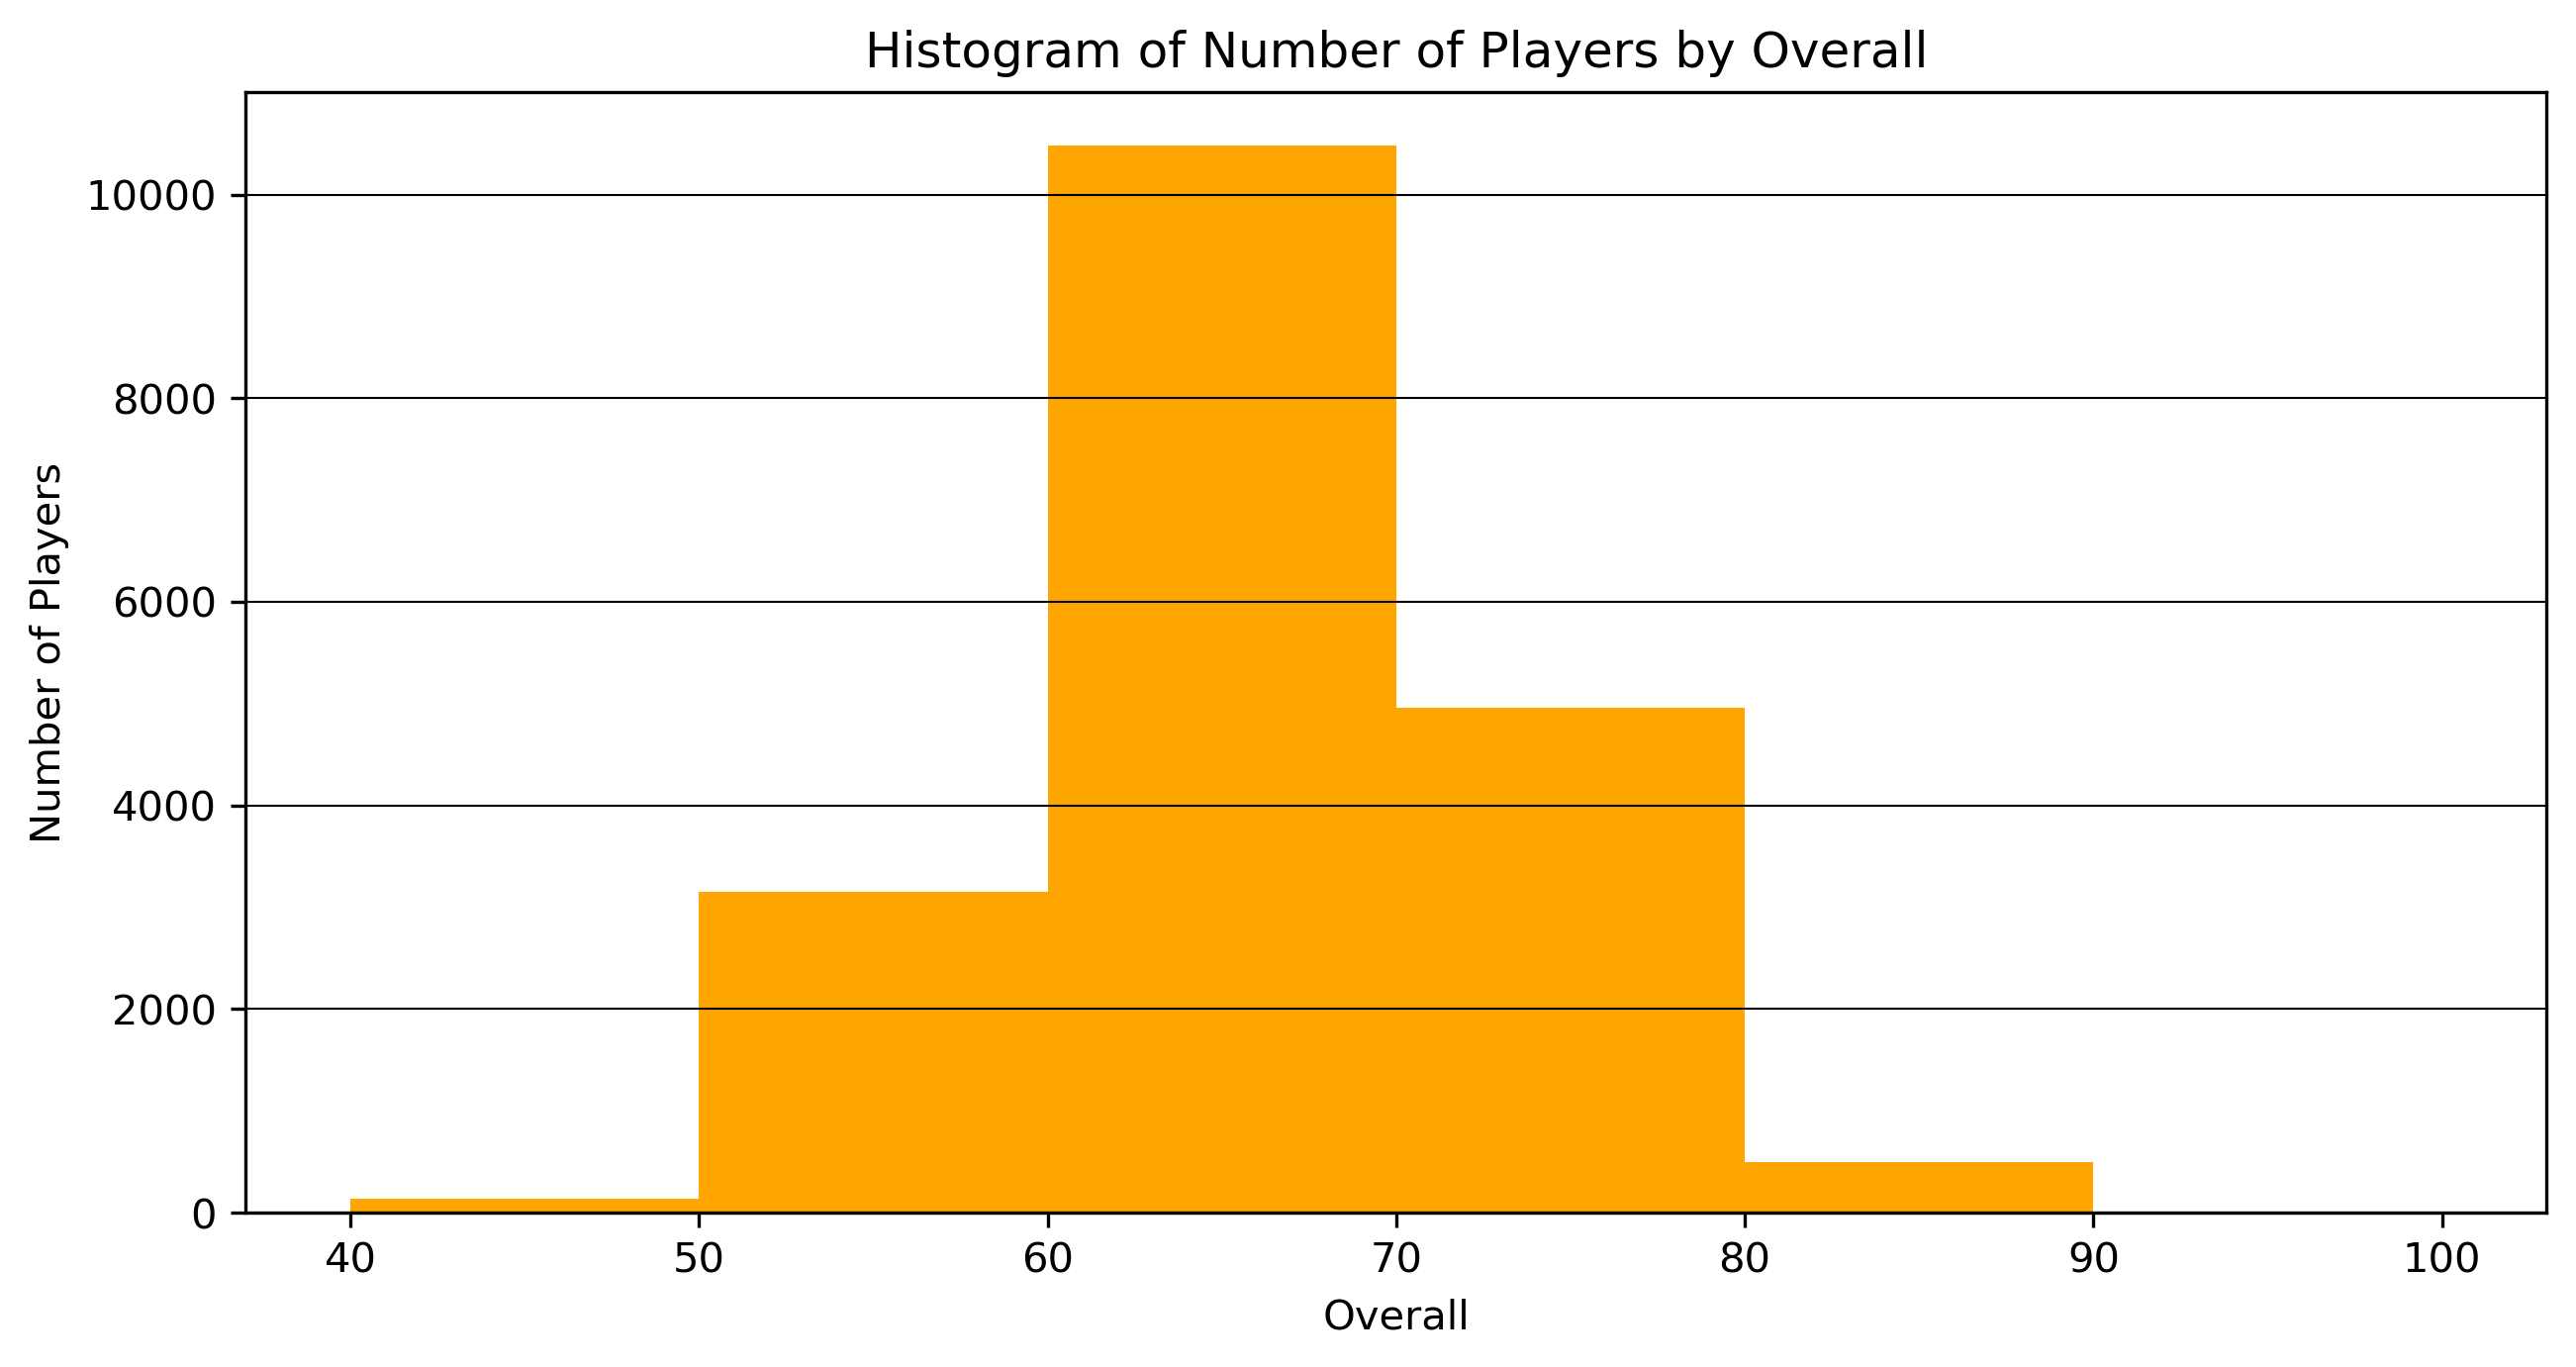

In [9]:
plt.figure(figsize=(10,5), dpi=300)

plt.title('Histogram of Number of Players by Overall')
bins1 = [40,50,60,70,80,90,100]
plt.hist(sort_overall['overall'],bins=bins1,color='orange')
plt.xlabel('Overall')
plt.ylabel('Number of Players')
plt.grid(True,color='black',linestyle='-',linewidth=0.5, axis='y')
plt.show()

## Top 10 Highest Value FIFA 22 Players

In [10]:
sort_players_value = df.sort_values(by='value_eur', ascending=False)
top_10_value = sort_players_value.head(10)
top_10_value = top_10_value[['short_name','value_eur','overall','age','player_positions','club_name','nationality_name']]
top_10_value.rename(columns = {'short_name':'Name','value_eur':'Value','age':'Age','overall':'Overall','club_name':'Club','nationality_name':'Nationality','player_positions':'Position/s'},inplace = True)
top_10_value.set_index('Name')

,Value,Overall,Age,Position/s,Club,Nationality
Name,,,,,,
K. Mbappé,194000000.0,91,22,"ST, LW",Paris Saint-Germain,France
E. Haaland,137500000.0,88,20,ST,Borussia Dortmund,Norway
H. Kane,129500000.0,90,27,ST,Tottenham Hotspur,England
Neymar Jr,129000000.0,91,29,"LW, CAM",Paris Saint-Germain,Brazil
K. De Bruyne,125500000.0,91,30,"CM, CAM",Manchester City,Belgium
R. Lewandowski,119500000.0,92,32,ST,FC Bayern München,Poland
F. de Jong,119500000.0,87,24,"CM, CDM, CB",FC Barcelona,Netherlands
G. Donnarumma,119500000.0,89,22,GK,Paris Saint-Germain,Italy
J. Sancho,116500000.0,87,21,"RM, CF, LM",Manchester United,England


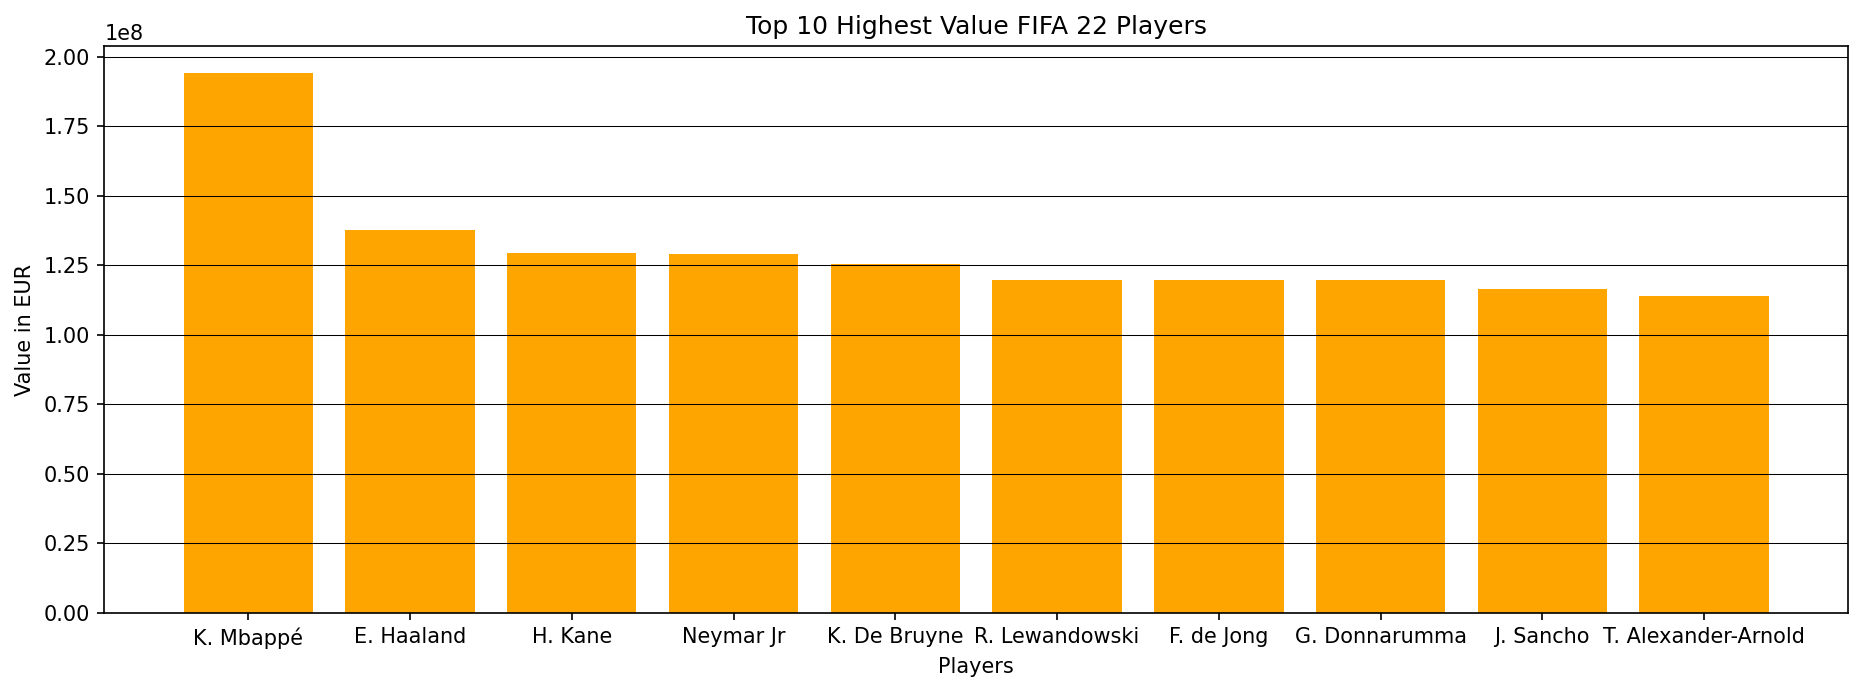

In [11]:
plt.figure(figsize=(15,5),dpi=150)
x2 = top_10_value['Name']
y2 = top_10_value['Value']
plt.bar(x2, y2,color='orange')
plt.grid(True,color='black',linestyle='-',linewidth=0.5, axis='y')
plt.title('Top 10 Highest Value FIFA 22 Players')
plt.xlabel('Players')
plt.ylabel('Value in EUR')
plt.show()

# Histogram Age

In [12]:
df['age'].describe()

count    19239.000000
mean        25.210822
std          4.748235
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         54.000000
Name: age, dtype: float64

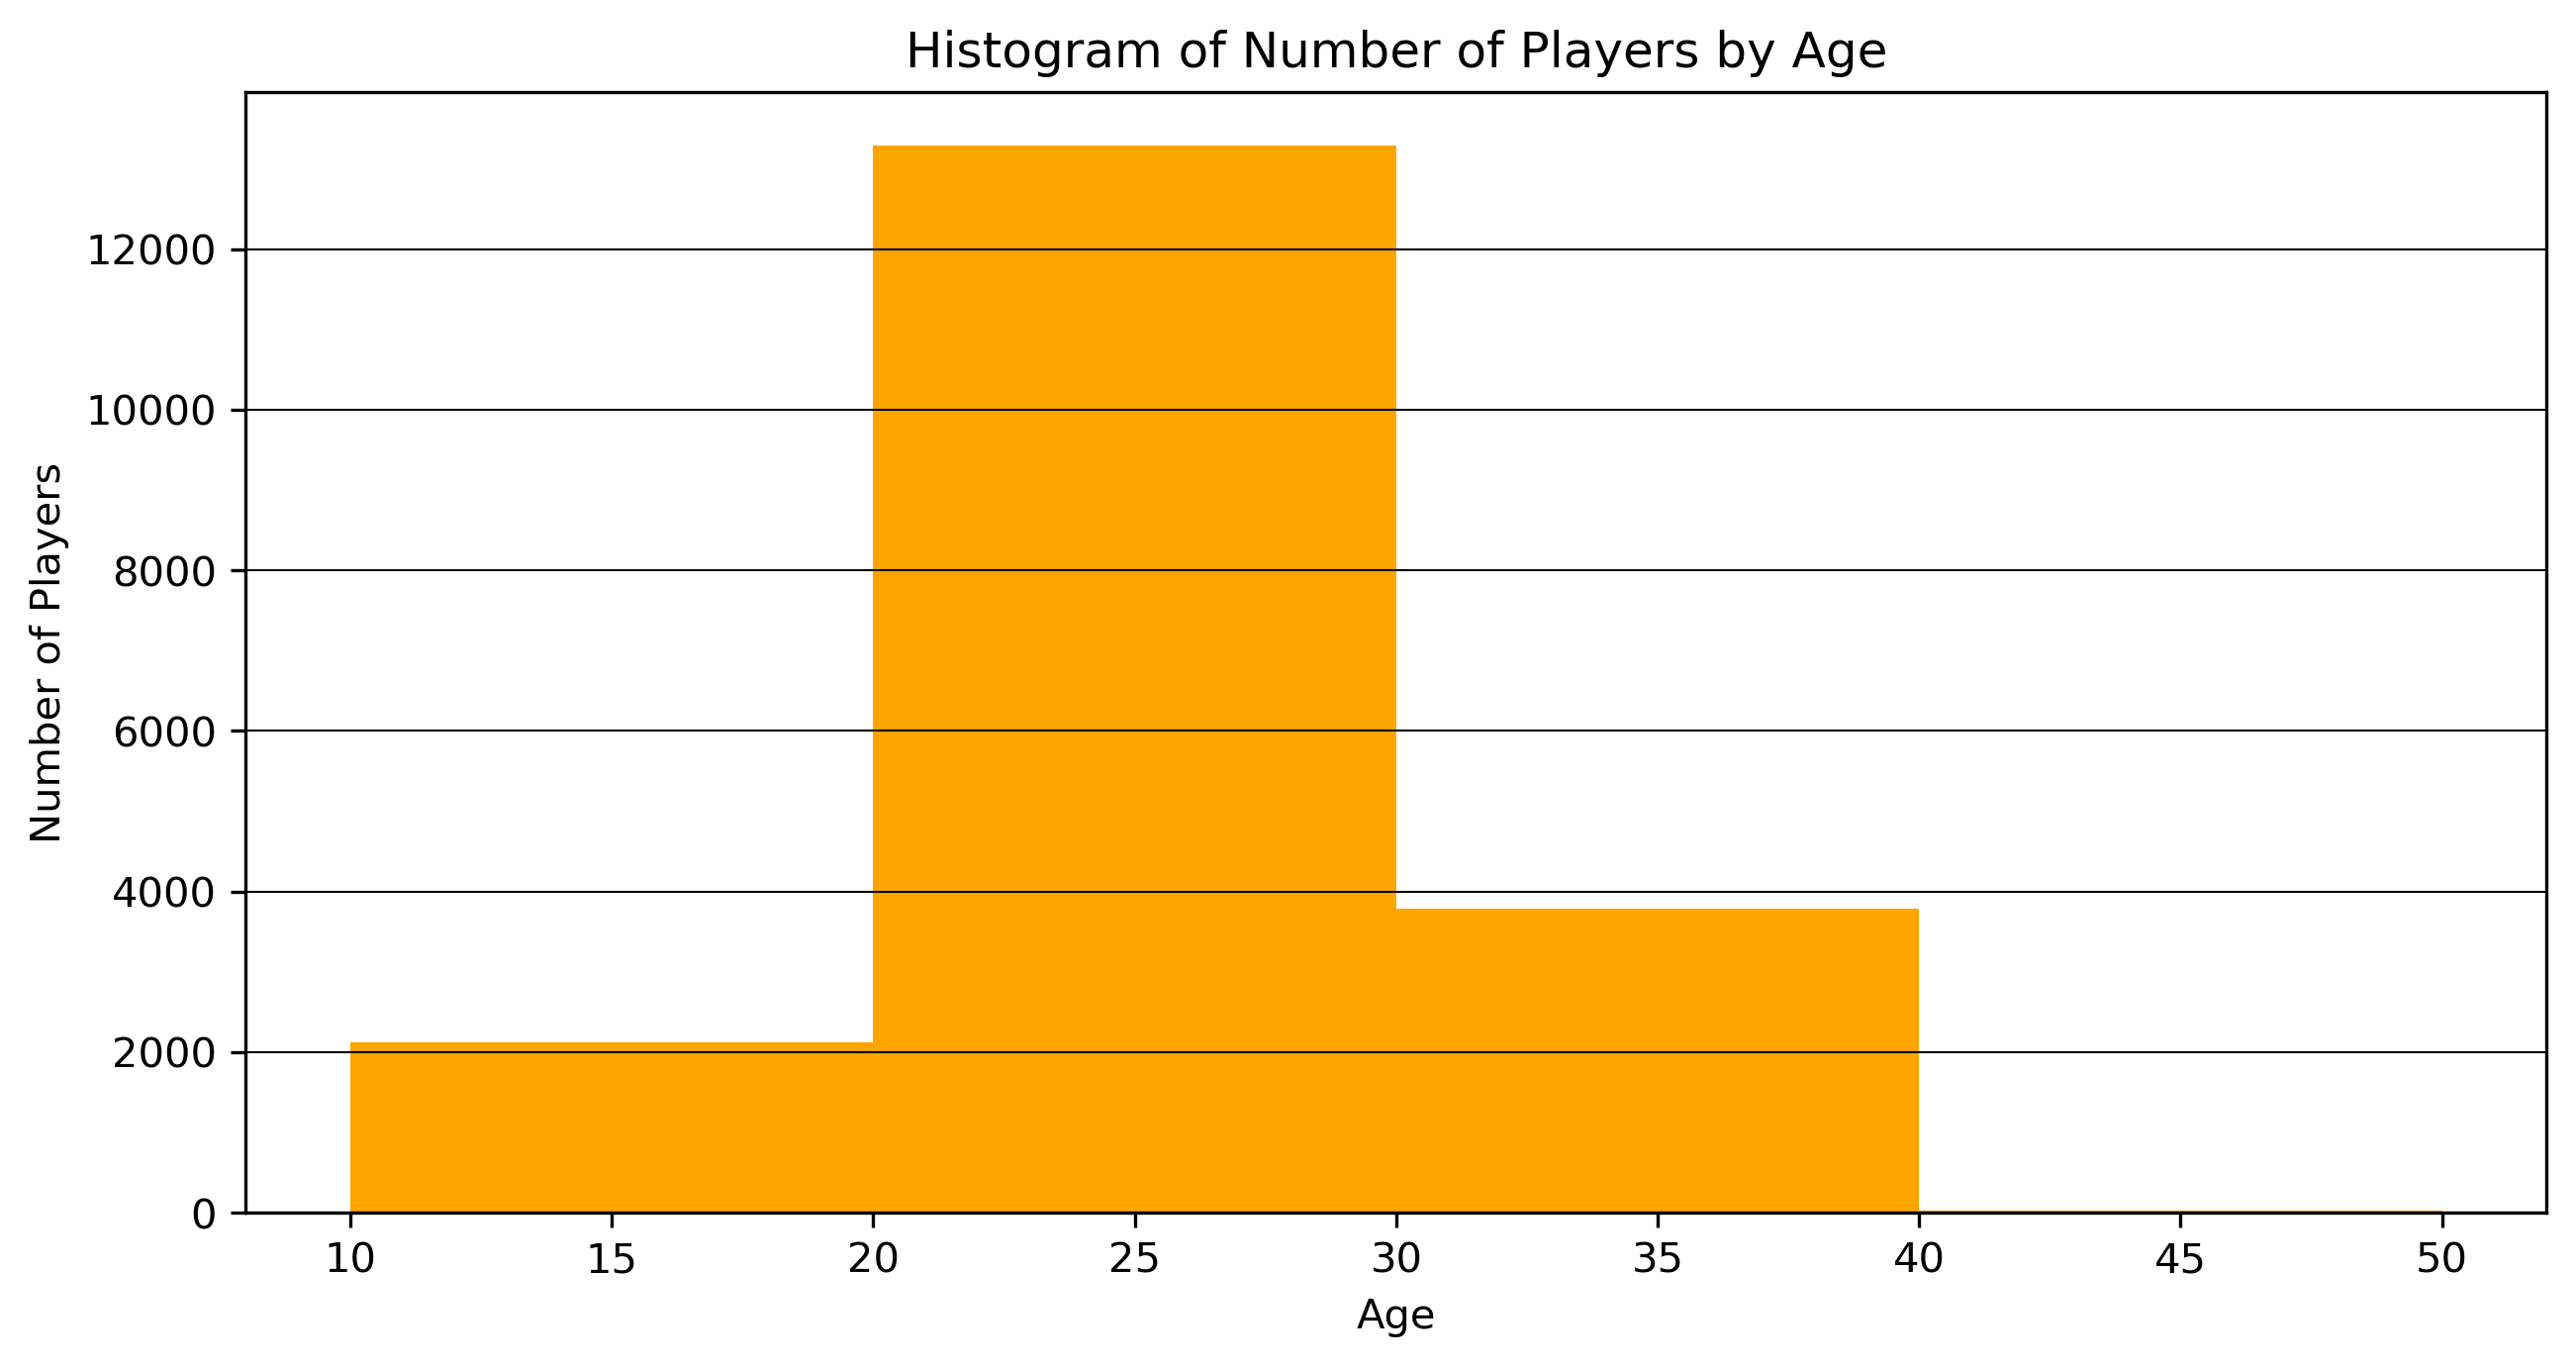

In [13]:
plt.figure(figsize=(10,5), dpi=300)

plt.title('Histogram of Number of Players by Age')
bins2 = [10,20,30,40,50]
plt.hist(df['age'],bins=bins2,color='orange')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True,color='black',linestyle='-',linewidth=0.5, axis='y')
plt.show()

In [14]:
#No. of players under 18 years old are 291
under_18 = df.loc[df['age'] < 18,['short_name','age']]
under_18.shape

(291, 2)

In [15]:
print(len(df['league_name'].unique()))


56


In [16]:
print(len(df['club_name'].unique()))

702


In [17]:
df['league_name'].value_counts()

USA Major League Soccer                 771
Argentina Primera División              727
English League Championship             717
English Premier League                  652
Spain Primera Division                  633
English League One                      626
Spanish Segunda División                625
English League Two                      613
Japanese J. League Division 1           589
French Ligue 1                          577
Italian Serie A                         563
German 1. Bundesliga                    551
Turkish Süper Lig                       543
German 3. Bundesliga                    542
French Ligue 2                          529
German 2. Bundesliga                    510
Portuguese Liga ZON SAGRES              505
Polish T-Mobile Ekstraklasa             496
Holland Eredivisie                      492
Mexican Liga MX                         488
Belgian Jupiler Pro League              488
Saudi Abdul L. Jameel League            468
Chinese Super League            

# Boxplot of Sample Teams

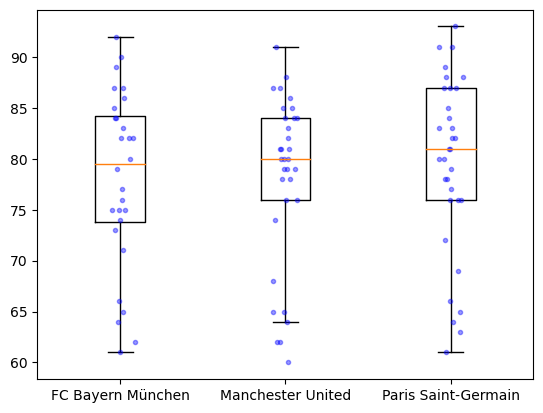

In [18]:
plt.style.use('default')

FCbayern = df.loc[df['club_name'] == 'FC Bayern München']['overall']
ManUnited = df.loc[df['club_name'] == 'Manchester United']['overall']
PSG = df.loc[df['club_name'] == 'Paris Saint-Germain']['overall']

labels = ['FC Bayern München','Manchester United','Paris Saint-Germain']

plt.boxplot([FCbayern,ManUnited,PSG],labels=labels,showfliers=False)

for i, j in  enumerate(['FC Bayern München','Manchester United','Paris Saint-Germain']):
    i += 1
    y = df.overall[df.club_name==j].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'b.', alpha=0.4)
    
plt.show()

# Football Club Overall (based on average of First 11 per Football Club)

In [19]:
team_list = []

for i in df['club_name'].unique():
    club_name_loc = df.loc[df['club_name'] == i,['short_name','overall','club_position','club_name']]
    club_overall_11 = club_name_loc.loc[(club_name_loc['club_position'] != 'SUB') & (club_name_loc['club_position'] != 'RES'),['overall']]
    club_overall_11_math = club_overall_11.apply(lambda x : x['overall'], axis=1).sum()
    club_overall_11_math = club_overall_11_math / club_overall_11.count()
    team_overall = (club_overall_11_math['overall'].round(2))
    team_list.append([i,team_overall])
    
    

In [20]:
team_overall_df = pd.DataFrame(team_list, columns=['Team', 'Overall'])
pd.set_option('display.max_rows',701)
team_overall_df = team_overall_df.dropna()
team_overall_df = team_overall_df.sort_values(by='Overall', ascending=False)
team_overall_df

,Team,Overall
0,Paris Saint-Germain,87.18
9,Liverpool,86.73
3,Manchester City,86.09
8,Real Madrid CF,85.55
1,FC Bayern München,85.36
2,Manchester United,84.82
4,Atlético de Madrid,84.64
5,FC Barcelona,83.82
11,Juventus,83.64
7,Chelsea,83.36


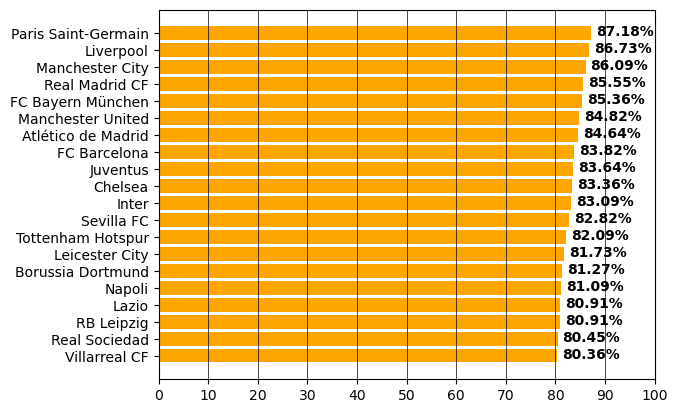

In [21]:
team_overall_df_20 = team_overall_df.head(20)
team_overall_df_20 = team_overall_df_20.sort_values(by='Overall', ascending=True)
y4 = team_overall_df_20['Team']
x4 = team_overall_df_20['Overall']
plt.barh(y4,x4,color='orange')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.grid(True,color='black',axis='x',linestyle='-',linewidth=0.5)
for i, v in enumerate(x4):
    plt.text(v + 1, i + -0.15, str(v)+'%', color='black', fontweight='bold')

plt.show()

# Number of Players by Countries

In [22]:
sample = df['nationality_name'].value_counts()
sample

England                     1719
Germany                     1214
Spain                       1086
France                       980
Argentina                    960
Brazil                       897
Japan                        546
Netherlands                  439
United States                413
Poland                       403
China PR                     385
Sweden                       385
Norway                       379
Republic of Ireland          374
Portugal                     373
Saudi Arabia                 355
Mexico                       352
Romania                      338
Italy                        338
Korea Republic               325
Colombia                     322
Belgium                      321
Austria                      319
Denmark                      307
Scotland                     293
Turkey                       291
Uruguay                      280
Australia                    266
India                        223
Venezuela                    212
Paraguay  

In [23]:
country_list = []
country_players = []
for i, j in sample.iteritems():
    country_list.append(i)
    country_players.append(j)
    print(i,j)


England 1719
Germany 1214
Spain 1086
France 980
Argentina 960
Brazil 897
Japan 546
Netherlands 439
United States 413
Poland 403
China PR 385
Sweden 385
Norway 379
Republic of Ireland 374
Portugal 373
Saudi Arabia 355
Mexico 352
Romania 338
Italy 338
Korea Republic 325
Colombia 322
Belgium 321
Austria 319
Denmark 307
Scotland 293
Turkey 291
Uruguay 280
Australia 266
India 223
Venezuela 212
Paraguay 197
Switzerland 192
Ecuador 178
Chile 165
Peru 156
Croatia 154
Bolivia 150
Wales 137
Ghana 128
Senegal 127
Nigeria 125
Serbia 123
Côte d'Ivoire 111
Czech Republic 104
Morocco 101
Greece 98
Russia 93
Northern Ireland 78
Canada 76
Bosnia and Herzegovina 71
Ukraine 69
Cameroon 65
Finland 64
South Africa 63
Slovakia 60
Iceland 58
Mali 57
Congo DR 53
Slovenia 52
Algeria 51
Hungary 49
Kosovo 46
Albania 46
New Zealand 37
Jamaica 36
Guinea 33
Tunisia 30
North Macedonia 28
Gambia 26
Georgia 25
Bulgaria 24
Costa Rica 23
Montenegro 23
Guinea Bissau 22
Israel 22
Cape Verde Islands 21
Iran 21
United Arab 

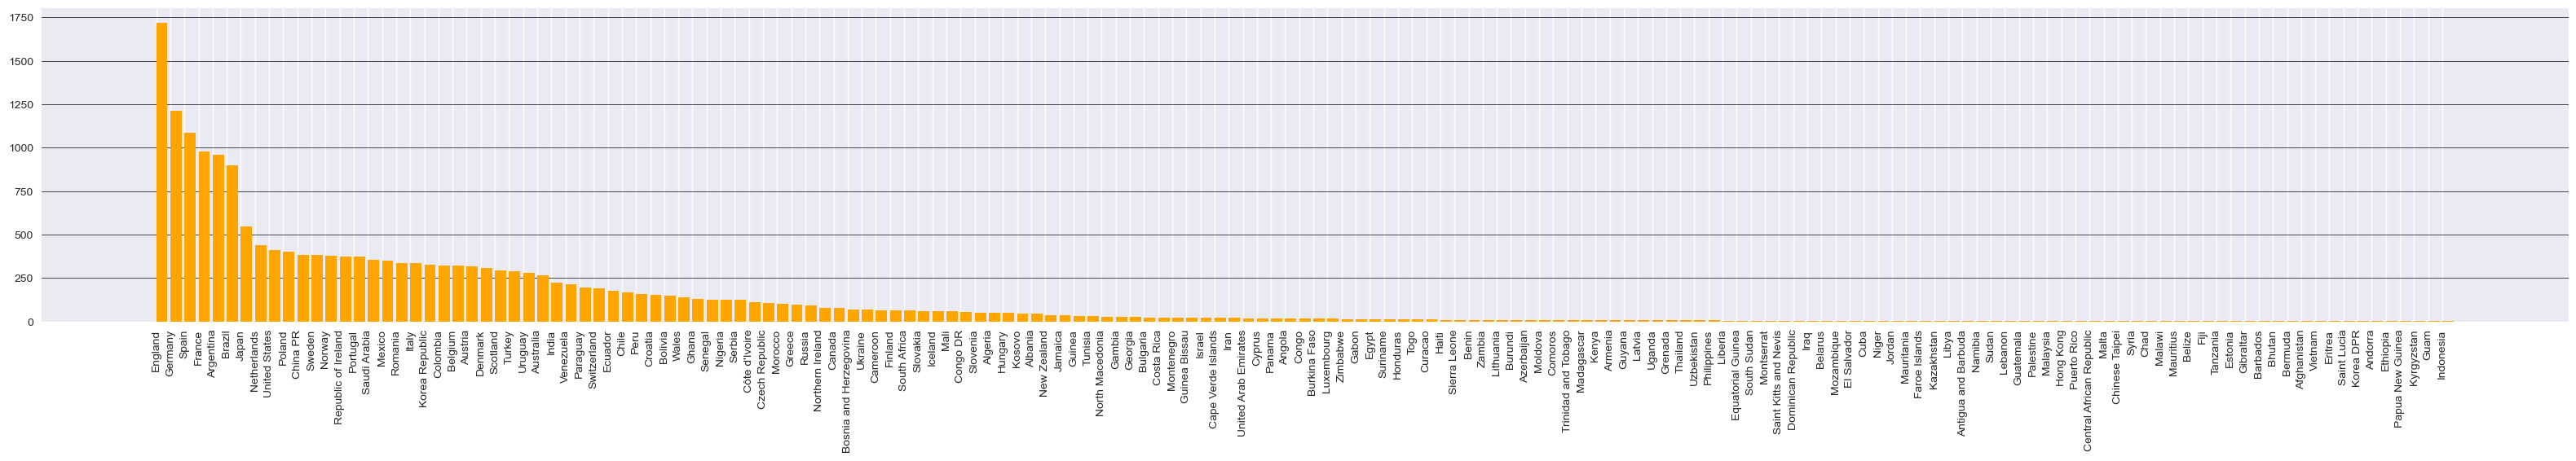

In [24]:
plt.style.use('seaborn')
plt.figure(figsize=(40,5),dpi=100)
plt.bar(country_list, country_players,color='orange',align='edge')
plt.grid(True,color='black',axis='y',linestyle='-',linewidth=0.5)
plt.xticks(rotation=90)

plt.show()

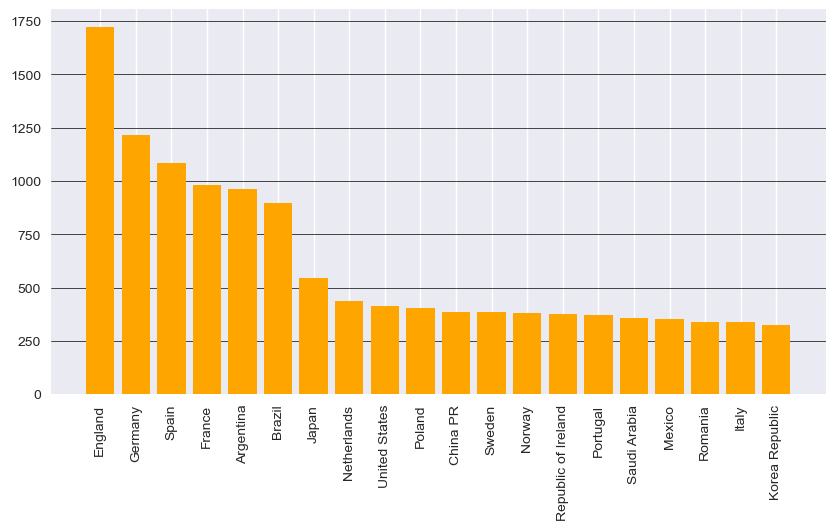

In [25]:
plt.figure(figsize=(10,5),dpi=100)
plt.bar(country_list[:20], country_players[:20],color='orange')
plt.grid(True,color='black',axis='y',linestyle='-',linewidth=0.5)
plt.xticks(rotation=90)

plt.show()

# List of Leagues by No. of Clubs on FIFA 22

In [26]:
df['league_name'].value_counts()

USA Major League Soccer                 771
Argentina Primera División              727
English League Championship             717
English Premier League                  652
Spain Primera Division                  633
English League One                      626
Spanish Segunda División                625
English League Two                      613
Japanese J. League Division 1           589
French Ligue 1                          577
Italian Serie A                         563
German 1. Bundesliga                    551
Turkish Süper Lig                       543
German 3. Bundesliga                    542
French Ligue 2                          529
German 2. Bundesliga                    510
Portuguese Liga ZON SAGRES              505
Polish T-Mobile Ekstraklasa             496
Holland Eredivisie                      492
Mexican Liga MX                         488
Belgian Jupiler Pro League              488
Saudi Abdul L. Jameel League            468
Chinese Super League            

In [27]:
league_list2 = []
for i in df['league_name'].unique():
    league_list2.append(i)

In [28]:
league_list2 = []
for i in df['league_name'].unique():
    league_list2.append(i)
    
league_club = []
for i in league_list2:
    x = df.loc[df['league_name'] == i,['club_name']]
    y = x['club_name'].unique()
    z = len(y)
    league_club.append([i,z,y])
print(league_club)

[['French Ligue 1', 20, array(['Paris Saint-Germain', 'AS Monaco', 'Olympique Lyonnais',
       'LOSC Lille', 'Olympique de Marseille', 'OGC Nice',
       'Montpellier Hérault SC', 'Stade Rennais FC',
       'FC Girondins de Bordeaux', 'FC Metz', 'Racing Club de Lens',
       'RC Strasbourg Alsace', 'Angers SCO', 'FC Nantes',
       'Stade de Reims', 'Stade Brestois 29', 'ESTAC Troyes',
       'AS Saint-Étienne', 'FC Lorient', 'Clermont Foot 63'], dtype=object)], ['German 1. Bundesliga', 18, array(['FC Bayern München', 'Borussia Dortmund', 'VfL Wolfsburg',
       'Borussia Mönchengladbach', 'RB Leipzig', 'Eintracht Frankfurt',
       'Bayer 04 Leverkusen', 'TSG Hoffenheim', '1. FC Union Berlin',
       'FC Augsburg', 'Sport-Club Freiburg', 'Hertha BSC',
       'DSC Arminia Bielefeld', '1. FC Köln', 'VfB Stuttgart',
       '1. FSV Mainz 05', 'VfL Bochum 1848', 'SpVgg Greuther Fürth'],
      dtype=object)], ['English Premier League', 20, array(['Manchester United', 'Manchester City', 'To

##### List of Clubs per League

In [29]:
new_df3 = pd.DataFrame(league_club, columns=['League','No. of Clubs', 'List of Clubs'])
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
new_df3 = new_df3.dropna()
new_df3 = new_df3.sort_values(by ='No. of Clubs', ascending = False)
new_df3

,League,No. of Clubs,List of Clubs
6,USA Major League Soccer,27,"[Los Angeles FC, Orlando City Soccer Club, Inter Miami CF, Seattle Sounders FC, Toronto FC, Atlanta United, LA Galaxy, New England Revolution, Portland Timbers, Minnesota United FC, Columbus Crew, Philadelphia Union, Chicago Fire Football Club, New York City FC, Sporting Kansas City, Club de Foot Montréal, D.C. United, Austin FC, Vancouver Whitecaps FC, FC Cincinnati, New York Red Bulls, Real Salt Lake, Nashville SC, Colorado Rapids, San Jose Earthquakes, Houston Dynamo, FC Dallas]"
21,Argentina Primera División,26,"[Boca Juniors, River Plate, Gimnasia y Esgrima La Plata, Racing Club, Club Atlético Independiente, Club Atlético Colón, Rosario Central, Club Atlético Lanús, Newell's Old Boys, Vélez Sarsfield, Club Atlético Talleres, Argentinos Juniors, Defensa y Justicia, Estudiantes de La Plata, Club Atlético Huracán, Club Atlético Banfield, San Lorenzo de Almagro, Unión de Santa Fe, Godoy Cruz, Atlético Tucumán, Arsenal de Sarandí, Patronato, Club Atlético Aldosivi, Club Atlético Central Córdoba, Platense, Club Atlético Sarmiento]"
54,English League Two,24,"[Swindon Town, Oldham Athletic, Northampton Town, Salford City, Exeter City, Carlisle United, Bristol Rovers, Colchester United, Port Vale, Tranmere Rovers, Bradford City, Leyton Orient, Rochdale, Newport County, Forest Green Rovers, Walsall, Crawley Town, Mansfield Town, Stevenage, Harrogate Town, Barrow, Hartlepool United, Scunthorpe United, Sutton United]"
45,English League One,24,"[Sheffield Wednesday, Wigan Athletic, Ipswich Town, Sunderland, Portsmouth, Wycombe Wanderers, Charlton Athletic, Rotherham United, Lincoln City, Fleetwood Town, Oxford United, Bolton Wanderers, Gillingham, Shrewsbury Town, Doncaster Rovers, Plymouth Argyle, Cambridge United, Burton Albion, Accrington Stanley, Cheltenham Town, AFC Wimbledon, Morecambe, Crewe Alexandra, Milton Keynes Dons]"
27,English League Championship,24,"[Fulham, West Bromwich Albion, Sheffield United, AFC Bournemouth, Nottingham Forest, Reading, Middlesbrough, Birmingham City, Millwall, Blackburn Rovers, Swansea City, Cardiff City, Queens Park Rangers, Bristol City, Preston North End, Barnsley, Coventry City, Stoke City, Derby County, Huddersfield Town, Peterborough United, Hull City, Luton Town, Blackpool]"
17,Spanish Segunda División,22,"[Unión Deportiva Las Palmas, CF Fuenlabrada, UD Ibiza, Real Valladolid CF, SD Huesca, Real Sporting de Gijón, Girona FC, Unión Deportiva Almería, CD Leganés, SD Eibar, Real Zaragoza, Málaga CF, Real Oviedo, SD Ponferradina, CD Tenerife, FC Cartagena, AD Alcorcón, SD Amorebieta, CD Lugo, Burgos CF, CD Mirandés, Real Sociedad B]"
0,French Ligue 1,20,"[Paris Saint-Germain, AS Monaco, Olympique Lyonnais, LOSC Lille, Olympique de Marseille, OGC Nice, Montpellier Hérault SC, Stade Rennais FC, FC Girondins de Bordeaux, FC Metz, Racing Club de Lens, RC Strasbourg Alsace, Angers SCO, FC Nantes, Stade de Reims, Stade Brestois 29, ESTAC Troyes, AS Saint-Étienne, FC Lorient, Clermont Foot 63]"
11,Turkish Süper Lig,20,"[Beşiktaş JK, İstanbul Başakşehir FK, Trabzonspor, Fatih Karagümrük S.K., Galatasaray SK, Fenerbahçe SK, Adana Demirspor, Demir Grup Sivasspor, Aytemiz Alanyaspor, Antalyaspor, Çaykur Rizespor, Gazişehir Gaziantep F.K., Göztepe SK, Yukatel Kayserispor, Yeni Malatyaspor, Kasimpaşa SK, Atakaş Hatayspor, İttifak Holding Konyaspor, Altay SK, GZT Giresunspor]"
51,German 3. Bundesliga,20,"[Türkgücü München, VfL Osnabrück, Viktoria Köln, SV Waldhof Mannheim 07, MSV Duisburg, TSV 1860 München, Eintracht Braunschweig, 1. FC Magdeburg, Hallescher FC, 1. FC Kaiserslautern, FC Würzburger Kickers, SV Meppen, 1. FC Saarbrücken, FSV Zwickau, SV Wehen Wiesbaden, Sportclub Verl, FC Viktoria 1889 Berlin, Borussia Dortmund II, SC Freiburg II, TSV Havelse]"
23,Japanese J. League Division 1,20,"[Vissel Kobe, Cerezo Osaka, Urawa Red Diamonds, FC Tokyo, Kawasaki Frontale, Yokohama F. Marinos, Kashima Antlers, Hokkaido Consadole Sapporo, Nagoya G

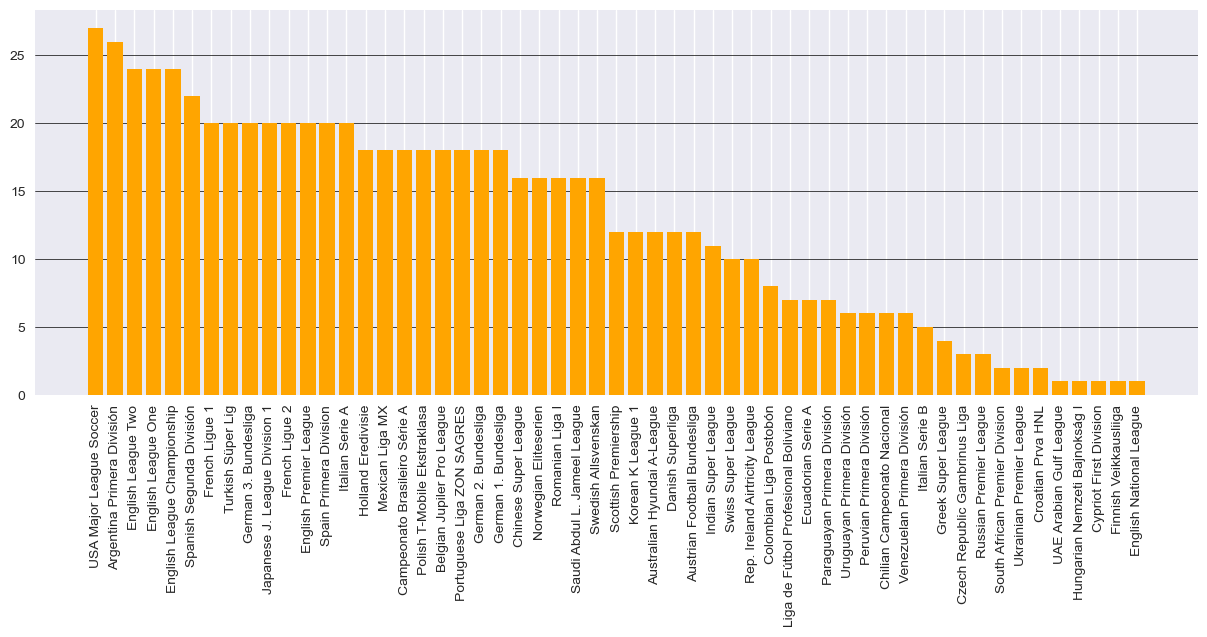

In [30]:
plt.figure(figsize=(15,5),dpi=100)
x = new_df3['League']
y = new_df3['No. of Clubs']
plt.bar(x, y,color='orange')
plt.grid(True,color='black',axis='y',linestyle='-',linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

In [31]:
#or
new_df4 = df.groupby('league_name')['club_name'].unique().to_frame()
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
new_df4

,club_name
league_name,
Argentina Primera División,"[Boca Juniors, River Plate, Gimnasia y Esgrima La Plata, Racing Club, Club Atlético Independiente, Club Atlético Colón, Rosario Central, Club Atlético Lanús, Newell's Old Boys, Vélez Sarsfield, Club Atlético Talleres, Argentinos Juniors, Defensa y Justicia, Estudiantes de La Plata, Club Atlético Huracán, Club Atlético Banfield, San Lorenzo de Almagro, Unión de Santa Fe, Godoy Cruz, Atlético Tucumán, Arsenal de Sarandí, Patronato, Club Atlético Aldosivi, Club Atlético Central Córdoba, Platense, Club Atlético Sarmiento]"
Australian Hyundai A-League,"[Western United FC, Melbourne City FC, Macarthur FC, Perth Glory, Sydney FC, Adelaide United, Newcastle Jets, Melbourne Victory, Wellington Phoenix, Western Sydney Wanderers, Central Coast Mariners, Brisbane Roar]"
Austrian Football Bundesliga,"[FC Red Bull Salzburg, LASK Linz, RZ Pellets Wolfsberger AC, SK Rapid Wien, SK Sturm Graz, FK Austria Wien, WSG Tirol, TSV Egger Glas Hartberg, FC Flyeralarm Admira, SV Ried, SC Rheindorf Altach, SK Austria Klagenfurt]"
Belgian Jupiler Pro League,"[Club Brugge KV, Royal Antwerp FC, KRC Genk, RSC Anderlecht, KAA Gent, Oud-Heverlee Leuven, Royal Charleroi S.C., KAS Eupen, SV Zulte Waregem, Standard de Liège, K Beerschot VA, Royale Union Saint-Gilloise, KV Kortrijk, KV Mechelen, KSV Cercle Brugge, Sint-Truidense VV, KV Oostende, Seraing]"
Campeonato Brasileiro Série A,"[Grêmio, RB Bragantino, Clube Atlético Mineiro, Sport Club Corinthians Paulista, Flamengo, Fluminense, Internacional, Fortaleza, Santos, São Paulo, Palmeiras, Ceará Sporting Club, Club Athletico Paranaense, Juventude, Bahia, Atlético Clube Goianiense, Cuiabá, Associação Chapecoense de Futebol]"
Chilian Campeonato Nacional,"[Universidad Católica, Club Deportivo Palestino, Unión La Calera, CD Antofagasta, CD Huachipato, Club de Deportes Cobresal]"
Chinese Super League,"[Shanghai Port FC, Beijing Guoan FC, Guangzhou City, Guangzhou FC, Shenzhen FC, Shanghai Shenhua FC, Dalian Professional Football Club, Shandong Taishan, Henan Songshan Longmen FC, Qingdao FC, Changchun Yatai FC, Chongqing Liangjiang Athletic, Tianjin Jinmen Tiger FC, Hebei FC, Shijiazhuang Ever Bright F.C., Wuhan FC]"
Colombian Liga Postobón,"[Deportivo Cali, Junior FC, Atlético Nacional, América de Cali, Club Deportes Tolima, La Equidad, Club Independiente Santa Fe, Deportivo Pasto]"
Croatian Prva HNL,"[Dinamo Zagreb, Hajduk Split]"


In [32]:
len(new_df4['club_name'][1])

12

In [33]:
#use this code if you want to know if the club exists on that league
check_club = new_df4['club_name'].astype(str)
check_club.str.contains('Boca Juniors')

league_name
Argentina Primera División               True
Australian Hyundai A-League             False
Austrian Football Bundesliga            False
Belgian Jupiler Pro League              False
Campeonato Brasileiro Série A           False
Chilian Campeonato Nacional             False
Chinese Super League                    False
Colombian Liga Postobón                 False
Croatian Prva HNL                       False
Cypriot First Division                  False
Czech Republic Gambrinus Liga           False
Danish Superliga                        False
Ecuadorian Serie A                      False
English League Championship             False
English League One                      False
English League Two                      False
English National League                 False
English Premier League                  False
Finnish Veikkausliiga                   False
French Ligue 1                          False
French Ligue 2                          False
German 1. Bundesliga  

In [34]:
new_df4['club_name'][1]

array(['Western United FC', 'Melbourne City FC', 'Macarthur FC',
       'Perth Glory', 'Sydney FC', 'Adelaide United', 'Newcastle Jets',
       'Melbourne Victory', 'Wellington Phoenix',
       'Western Sydney Wanderers', 'Central Coast Mariners',
       'Brisbane Roar'], dtype=object)

# Piechart of Body Type

In [35]:
body_type1 = df['body_type'].value_counts()
body_type1

Normal (170-185)    6685
Normal (185+)       4236
Lean (170-185)      4086
Lean (185+)         1938
Normal (170-)        669
Stocky (170-185)     560
Lean (170-)          477
Stocky (185+)        355
Unique               136
Stocky (170-)         97
Name: body_type, dtype: int64

In [36]:
body_type_list = []
body_type_count = []
for i, j in body_type1.iteritems():
    body_type_list.append(i)
    body_type_count.append(j)
    print(i,j)

Normal (170-185) 6685
Normal (185+) 4236
Lean (170-185) 4086
Lean (185+) 1938
Normal (170-) 669
Stocky (170-185) 560
Lean (170-) 477
Stocky (185+) 355
Unique 136
Stocky (170-) 97


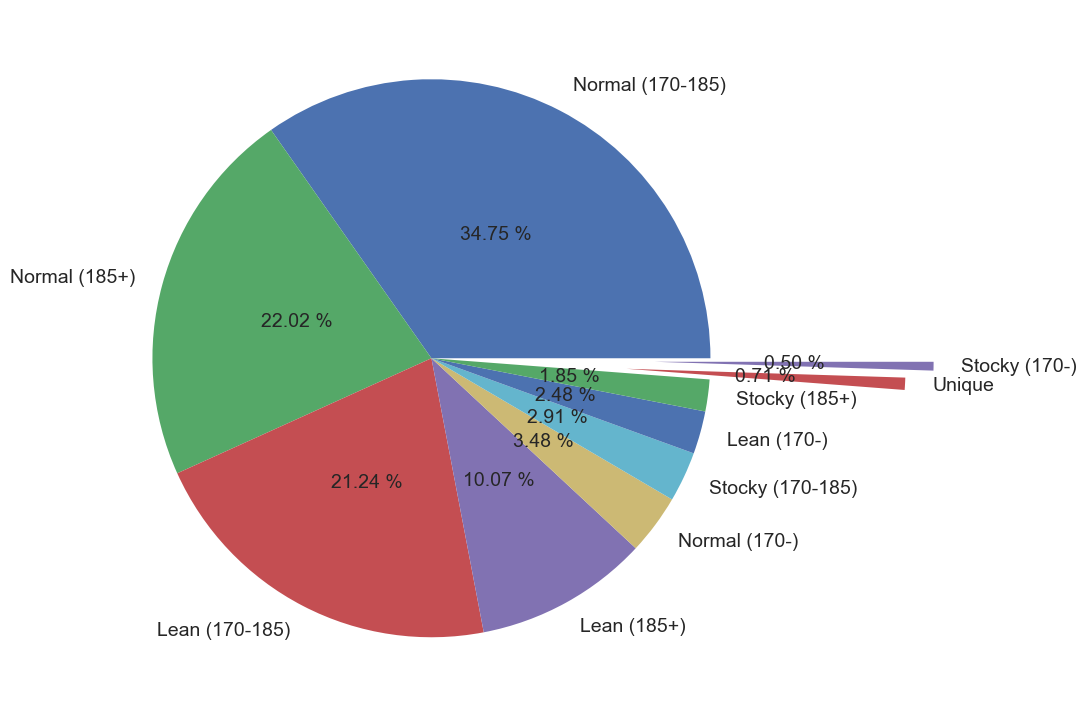

In [37]:
plt.figure(figsize=(9,10),dpi=100)
explode=[0,0,0,0,0,0,0,0,.7,0.8]
plt.pie(body_type_count,labels=body_type_list,pctdistance=0.5, explode = explode, textprops={'fontsize':14},autopct='%.2f %%')
plt.show()

# Top 10 Strikers

In [38]:
top_10_ST = df.loc[df['player_positions'].str.contains('ST',case=False)]
top_10_ST = top_10_ST.sort_values(by='overall',ascending=False)

#Below codes are different kinds of choosing a column. By filtering them or excluding them.
top_10_ST = top_10_ST.iloc[0:20, 1:69].head(10)
top_10_ST.drop(['player_url', 'value_eur', 'dob', 'wage_eur'], axis=1, inplace=True)
top_10_ST.drop(top_10_ST.columns[8:22],axis=1,inplace=True)
top_10_ST.drop(top_10_ST.columns[14:18],axis=1,inplace=True)

#top_10_ST.info(verbose=True) use this to check the indexes of column 
#if your using the example code. top_10_ST.drop(top_10_ST.columns[8:22],axis=1,inplace=True)

In [39]:
top_10_ST.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 30
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  10 non-null     object 
 1   long_name                   10 non-null     object 
 2   player_positions            10 non-null     object 
 3   overall                     10 non-null     int64  
 4   potential                   10 non-null     int64  
 5   age                         10 non-null     int64  
 6   height_cm                   10 non-null     int64  
 7   weight_kg                   10 non-null     int64  
 8   preferred_foot              10 non-null     object 
 9   weak_foot                   10 non-null     int64  
 10  skill_moves                 10 non-null     int64  
 11  international_reputation    10 non-null     int64  
 12  work_rate                   10 non-null     object 
 13  body_type                   10 non-nu

In [40]:
top_10_ST.columns = top_10_ST.columns.str.replace('_', ' ')
top_10_ST.columns = top_10_ST.columns.str.title()
#Should have done this to the first created Dataframe

top_10_ST

,Short Name,Long Name,Player Positions,Overall,Potential,Age,Height Cm,Weight Kg,Preferred Foot,Weak Foot,Skill Moves,International Reputation,Work Rate,Body Type,Pace,Shooting,Passing,Dribbling,Defending,Physic,Attacking Crossing,Attacking Finishing,Attacking Heading Accuracy,Attacking Short Passing,Attacking Volleys,Skill Dribbling,Skill Curve,Skill Fk Accuracy,Skill Long Passing,Skill Ball Control,Movement Acceleration,Movement Sprint Speed,Movement Agility,Movement Reactions,Movement Balance,Power Shot Power,Power Jumping,Power Stamina,Power Strength,Power Long Shots,Mentality Aggression,Mentality Interceptions,Mentality Positioning,Mentality Vision,Mentality Penalties,Mentality Composure
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,34,170,72,Left,4,4,5,Medium/Low,Unique,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96
1,R. Lewandowski,Robert Lewandowski,ST,92,92,32,185,81,Right,4,4,5,High/Medium,Unique,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,36,187,83,Right,4,5,5,High/Low,Unique,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95
6,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,22,182,73,Right,4,5,4,High/Low,Unique,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88
9,H. Kane,Harry Kane,ST,90,90,27,188,89,Right,5,3,4,High/High,Unique,70.0,91.0,83.0,83.0,47.0,83.0,80,94,86,85,88,83,83,65,86,85,65,74,71,92,70,91,79,83,85,86,80,44,94,87,91,91
11,K. Benzema,Karim Benzema,"CF, ST",89,89,33,185,81,Right,4,4,4,Medium/Medium,Normal (170-185),76.0,86.0,81.0,87.0,39.0,77.0,75,90,89,86,86,87,81,73,73,90,77,75,79,91,72,85,79,78,82,79,63,39,90,87,84,90
23,L. Suárez,Luis Alberto Suárez Díaz,ST,88,88,34,182,83,Right,4,3,5,High/Medium,Unique,72.0,90.0,82.0,84.0,47.0,83.0,80,93,84,83,90,83,86,82,77,86,76,69,75,92,78,89,69,78,85,88,87,41,91,84,83,87
25,R. Lukaku,Romelu Lukaku Menama,ST,88,88,28,191,94,Left,4,3,4,Medium/Medium,Unique,84.0,87.0,74.0,78.0,39.0,83.0,73,92,89,77,78,83,78,66,70,77,81,87,60,91,52,89,76,71,95,74,71,27,89,75,88,86
29,E. Haaland,Erling Braut Haaland,ST,88,93,20,194,94,Left,3,3,4,High/High,Unique,89.0,91.0,65.0,80.0,45.0,88.0,47,94,69,77,88,78,77,62,51,85,82,94,75,88,72,94,74,82,93,87,85,43,89,71,76,84
30,S. Agüero,Sergio Leonel Agüero del Castillo,ST,87,87,33,173,70,Right,4,4,4,High/Medium,Unique,71.0,89.0,75.0,87.0,33.0,69.0,70,93,78,80,85,86,83,73,64,88,75,68,82,89,90,90,78,62,74,83,65,24,91,80,75,91


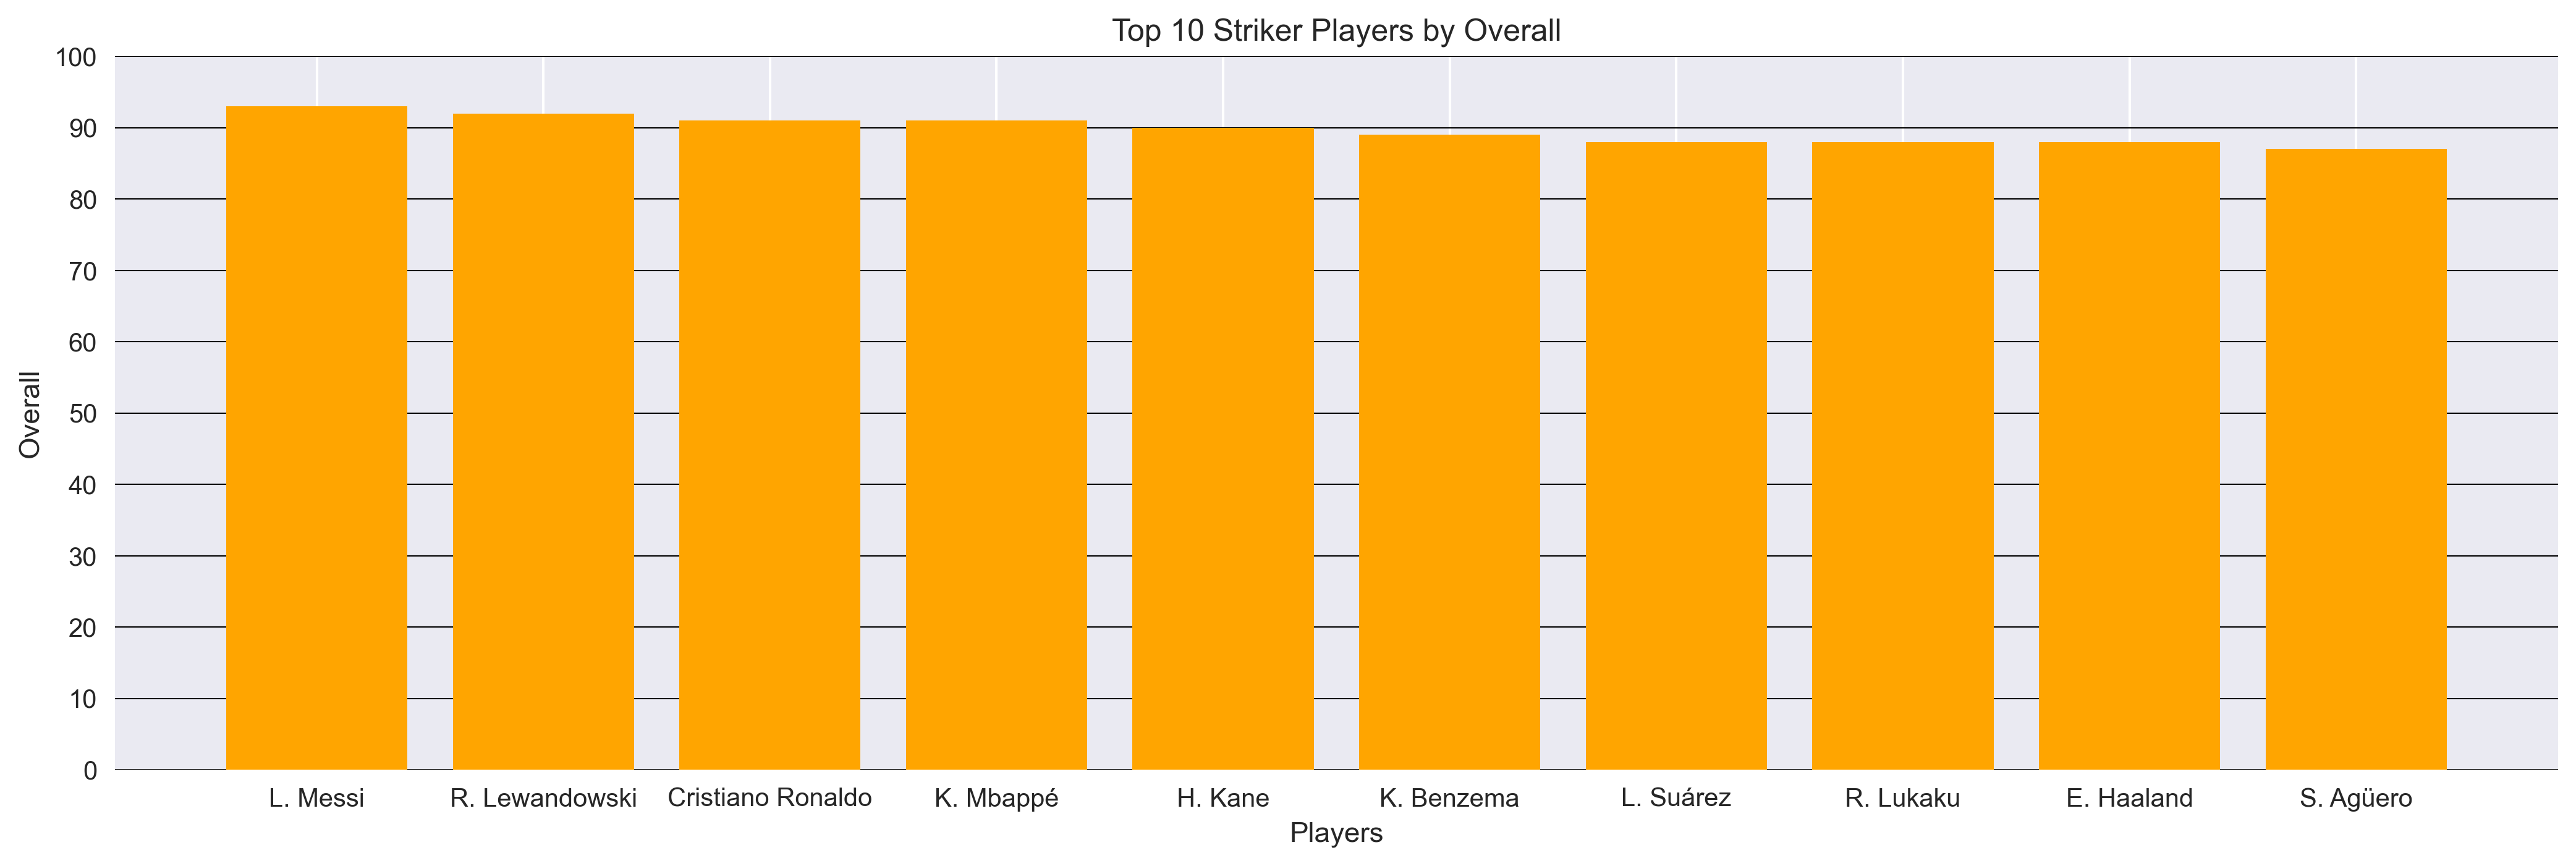

In [41]:
plt.figure(figsize=(17,5),dpi=300)
x5 = top_10_ST['Short Name']
y5 = top_10_ST['Overall']
plt.bar(x5,y5,color='orange')
plt.grid(True,color='black',linestyle='-',linewidth=0.5, axis='y')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])

plt.title('Top 10 Striker Players by Overall')
plt.xlabel('Players')
plt.ylabel('Overall')

plt.show()